# Sentiment Analysis of Apple corporation tweets 
*By: Xavier Torres*

In this notebook we will analyze open source Apple tweets, clean data, analyze data, and finally build a classifier of tweets labelling them with 0 (negative sentiment), 1 (neutral) or 2 (positive). We will focus on tweets written in English.

 ![image_not_available](https://raw.githubusercontent.com/torresxavier/Resources/master/Sentiment-analysis.jpg)

### Loading and exploring the dataset of tweets stored in a csv file

In [1]:
# Importing first of all all the libraries we will need 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from nltk import word_tokenize
from langdetect import detect_langs
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer 
from nltk.stem import PorterStemmer
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import re

In [2]:
df = pd.read_csv("Apple_tweets.csv", sep =";")

In [3]:
df.head()

,tweet_content
0,"""Eli Apple is a combative, physical corner wit..."
1,"""Sir, Apple Care does not cover us cleaning bi..."
2,"""True Colors"" is OUT NOW on iTunes USA! https:..."
3,#1 Online Promo! Work with DJ Kay Slay / Strai...
4,#AppleNews: Latest news about #Apple ( #iPhone...


In [4]:
df.shape

(254, 1)

Let's now create a new dataset only selecting the tweets written in English:

In [5]:
df.iloc[0, 0]

'"Eli Apple is a combative, physical corner with good ball skills." - Coach McAdoo'

In [6]:
languages = [] 

# Loop over the rows of the dataset and append  
for row in range(len(df['tweet_content'])):
    languages.append(detect_langs(df.iloc[row, 0]))

# Clean the list by splitting     
languages = [str(lang).split(':')[0][1:] for lang in languages]

# Assign the list to a new feature 
df['language'] = languages

In [7]:
df.head(15)

,tweet_content,language
0,"""Eli Apple is a combative, physical corner wit...",en
1,"""Sir, Apple Care does not cover us cleaning bi...",en
2,"""True Colors"" is OUT NOW on iTunes USA! https:...",en
3,#1 Online Promo! Work with DJ Kay Slay / Strai...,en
4,#AppleNews: Latest news about #Apple ( #iPhone...,en
5,#applewatch RT &amp; FOLLOW .@hiddencash314 #a...,en
6,#Artwiz Crazy tweets about all the fun and odd...,en
7,#ElComercio informa a través de este espacio l...,es
8,#Japon: El nuevo sencillo de @DulceMaria #NoSé...,es
9,#MaxIt is the global voice of #indiefilm - #sh...,en


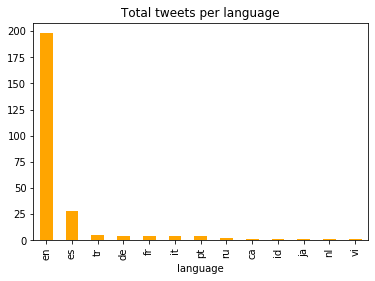

In [8]:
df_by_lang = df.groupby(by="language").count().sort_values(by='tweet_content', ascending=False)
df_by_lang.plot(kind = 'bar', 
                color='orange', 
                legend = False, 
                title = 'Total tweets per language')

In [9]:
df_en = df[df['language'] == 'en']

In [10]:
df_en.drop(columns = 'language',  inplace = True)

C:\Users\torre\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
df_en.shape

(198, 1)

In [12]:
df_en.head()

,tweet_content
0,"""Eli Apple is a combative, physical corner wit..."
1,"""Sir, Apple Care does not cover us cleaning bi..."
2,"""True Colors"" is OUT NOW on iTunes USA! https:..."
3,#1 Online Promo! Work with DJ Kay Slay / Strai...
4,#AppleNews: Latest news about #Apple ( #iPhone...


Let's export this dataset o CSV to label the sentiment on each tweet, so that we can later build a classifier.

In [13]:
df_en.to_csv('Apple_tweets_ENGLISH.csv', index = False, sep = ';')

### Creating a WordCloud
We will use STOP_WORDS from English Regular Expressions to avoid counting articles, prepositions and other words with no information. We will update this stopwords list with some words from our context that do not add value, i.e. 'Apple' or 'iTunes'.

In [14]:
df_en = pd.read_csv("Apple_tweets_ENGLISH_labeled.csv", sep =";")

In [15]:
# Define and update the list of stopwords
stopwords = set(STOPWORDS)

In [16]:
stopwords = stopwords.union(['Apple', 'apple', 'iTunes','itunes','music', 'co', 'The', 'Tweet', 'tweet', 'Twitter', 'twitter', 'Facebook', 'facebook'])

In [17]:
stopwords

{'Apple',
 'Facebook',
 'The',
 'Tweet',
 'Twitter',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'apple',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'co',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'facebook',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'iTunes',
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'itunes',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 'music',
 "mustn't",
 'my',
 'myself'

In [18]:
df_en.head()

,tweet_content,Sentiment
0,"""Eli Apple is a combative, physical corner wit...",2
1,"""Sir, Apple Care does not cover us cleaning bi...",1
2,"""True Colors"" is OUT NOW on iTunes USA! https:...",3
3,#1 Online Promo! Work with DJ Kay Slay / Strai...,3
4,#AppleNews: Latest news about #Apple ( #iPhone...,3


In [19]:
#create a sigle string with all tweets
all_tweets = ''
for i in range(len(df_en['tweet_content'])):
    all_tweets = all_tweets + df_en.iloc[i, 0]

In [20]:
all_tweets

'"Eli Apple is a combative, physical corner with good ball skills." - Coach McAdoo"Sir, Apple Care does not cover us cleaning bits of pumpkin seeds out of your keyboard every 6 weeks" "I\'ll see you fascists in court, then""True Colors" is OUT NOW on iTunes USA! https://t.co/rftrCuwNnI #BuyTrueColorsOniTunes https://t.co/pLEQ3viTyn#1 Online Promo! Work with DJ Kay Slay / Straight Stuntin Mag / Wendy Williams / Red Man / DJ Funk Master Flex & Tons of Signed & Unsigned artist  908.964.7777#AppleNews: Latest news about #Apple ( #iPhone) . We are not related with Apple® . Spanish: @MundoApple#applewatch RT &amp; FOLLOW .@hiddencash314 #apple https://t.co/S7hHHQCqg1#Artwiz Crazy tweets about all the fun and odd things in life, plus Art and Culture! Enjoy the moments of your day, make them count. #respectplanetearth#MaxIt is the global voice of #indiefilm - #short #series #feature. Campaign to Release! Submit Your Press Release Now! https://t.co/YsYhWf8C96#techtweets from #fintech #leader.  

In [21]:
def paint_wordcloud(text):
    # Create and generate a word cloud image
    my_cloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)

    # Display the generated wordcloud image
    plt.figure(figsize=(10,7))
    plt.imshow(my_cloud, interpolation='bilinear') 
    plt.axis("off")
    plt.show()

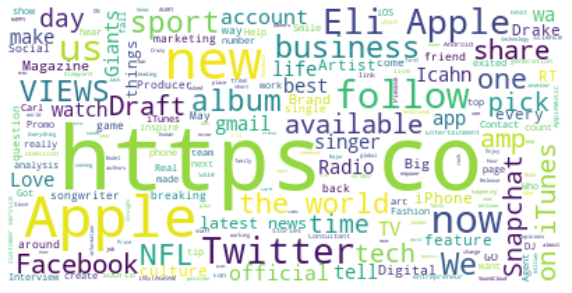

In [22]:
paint_wordcloud(all_tweets)

...Mmmmm, some problems with the Stopwords there. Apple shouldnt' be there, Facebook neither... let's try cleaning the tweets first then.

In [23]:
#removing stopwords
for word in stopwords:
    all_tweets = re.sub(rf'\b{word}\b','_',all_tweets) 
    
#removing URLs
all_tweets  = re.sub(r'http\S+', '_', all_tweets) 

In [24]:
all_tweets

'"Eli _ _ _ combative, physical corner _ good ball skills." - Coach McAdoo"Sir, _ Care _ _ cover us cleaning bits _ pumpkin seeds _ _ _ keyboard every 6 weeks" "I\'ll see _ fascists _ court, _""True Colors" _ OUT NOW _ _ USA! _ #BuyTrueColorsOniTunes _ Online Promo! Work _ DJ Kay Slay / Straight Stuntin Mag / Wendy Williams / Red Man / DJ Funk Master Flex & Tons _ Signed & Unsigned artist  908.964.7777#AppleNews: Latest news _ #_ ( #iPhone) . We _ _ related _ _® . Spanish: @MundoApple#applewatch RT &amp; FOLLOW .@hiddencash314 #_ _ Crazy tweets _ _ _ fun _ odd things _ life, plus Art _ Culture! Enjoy _ moments _ _ day, make _ count. #respectplanetearth#MaxIt _ _ global voice _ #indiefilm - #short #series #feature. Campaign _ Release! Submit Your Press Release Now! _ _ #fintech #leader.  RT _ auto _ _ _ endorsements.  #followme #followback _ _ _ now _ _! _ ON APPLE MUSIC RN SO CONFUSED/HAPPY 😩 😩 \n_ _ \n#OVOSOUNDRADIO. \nStay locked. @Drake @Beats1 _ _ You Perceive Everything) It\'s Not

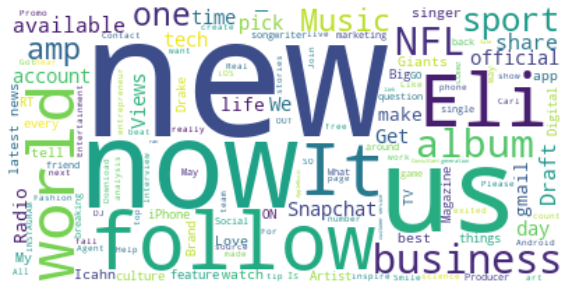

In [25]:
paint_wordcloud(all_tweets)

Cool, this one has a better aspect :-)

### Vectorizing the tweets using the TfidfVectorizer 
As BOW (Bag of Words) does not take into account if a word happens too much in all the tweets,  TfIdf does. For instance, if analyzing tweets from AmerAirlines, BOW will rate high the AmerAirlines word, but TfIdf not,because it appears in a lot of tweets It also Kind of substitutes defining StopWords.

> **TfIdf = Term frequency * Inverse document frequency**

Just in case, we will first clean the df using the previous method. Deleting stopwords from tweets.

In [26]:
df_en['tweet_content_clean'] = df_en['tweet_content']

In [27]:
#removing stopwords and storing new string in new column called 'tweet_content_clean'

for word in stopwords:
    for i in range(len(df_en)):
        df_en.iloc[i, 2] = re.sub(rf'\b{word}\b','_', df_en.iloc[i, 2]) #removing stopwords
        df_en.iloc[i, 2] = re.sub(r'http\S+', '_', df_en.iloc[i, 2]) #removing URLs

In [28]:
df_en.head()

,tweet_content,Sentiment,tweet_content_clean
0,"""Eli Apple is a combative, physical corner wit...",2,"""Eli _ _ _ combative, physical corner _ good b..."
1,"""Sir, Apple Care does not cover us cleaning bi...",1,"""Sir, _ Care _ _ cover us cleaning bits _ pump..."
2,"""True Colors"" is OUT NOW on iTunes USA! https:...",3,"""True Colors"" _ OUT NOW _ _ USA! _ #BuyTrueCol..."
3,#1 Online Promo! Work with DJ Kay Slay / Strai...,3,#1 Online Promo! Work _ DJ Kay Slay / Straight...
4,#AppleNews: Latest news about #Apple ( #iPhone...,3,#AppleNews: Latest news _ #_ ( #iPhone) . We _...


In [29]:
# Let's build the vectorizer
vect = TfidfVectorizer(stop_words=stopwords, ngram_range = (1, 2), 
                       max_features=2000, 
                       token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(df_en['tweet_content_clean'])


C:\Users\torre\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [30]:
# Create sparse matrix from the vectorizer
X = vect.transform(df_en['tweet_content_clean'])

# Create a DataFrame
tweets_vectorized = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

In [31]:
tweets_vectorized.shape

(201, 2000)

In [32]:
tweets_vectorized.head()

,aapl,able,able entertain,accepting,accepting aristotle,according,according mom,account,account homepage,account visit,...,με προσφορές,προσφορές,προσφορές έως,πρώτο,πρώτο private,το,το πρώτο,구혜선,구혜선 그리고봄,그리고
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df_en.shape

(201, 3)

In [34]:
df_en = pd.merge(df_en, tweets_vectorized, how='left', left_index = True, right_index=True)

In [35]:
df_en.shape

(201, 2003)

In [36]:
df_en.head()

,tweet_content,Sentiment,tweet_content_clean,aapl,able,able entertain,accepting,accepting aristotle,according,according mom,...,με προσφορές,προσφορές,προσφορές έως,πρώτο,πρώτο private,το,το πρώτο,구혜선,구혜선 그리고봄,그리고
0,"""Eli Apple is a combative, physical corner wit...",2,"""Eli _ _ _ combative, physical corner _ good b...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"""Sir, Apple Care does not cover us cleaning bi...",1,"""Sir, _ Care _ _ cover us cleaning bits _ pump...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"""True Colors"" is OUT NOW on iTunes USA! https:...",3,"""True Colors"" _ OUT NOW _ _ USA! _ #BuyTrueCol...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,#1 Online Promo! Work with DJ Kay Slay / Strai...,3,#1 Online Promo! Work _ DJ Kay Slay / Straight...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,#AppleNews: Latest news about #Apple ( #iPhone...,3,#AppleNews: Latest news _ #_ ( #iPhone) . We _...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Good. Up to now we have a dataset with clean **english tweet**s, tokenized using the **Term frequency -Inverse document frequency method**, and with the **sentimet** for each tweet.

## Building a classifier

Let's first check how many tweets per sentiment we have:

In [37]:
df_by_sentiment = df_en.groupby(by="Sentiment").count().sort_values(by='tweet_content_clean', ascending=False)

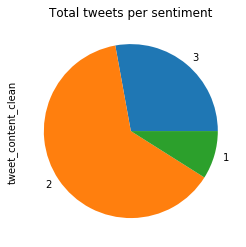

In [38]:
df_by_sentiment = df_en.groupby(by="Sentiment").count().sort_values(by='Sentiment', ascending=False)
df_by_sentiment['tweet_content_clean'].plot.pie(legend = False,
                                            title = 'Total tweets per sentiment')

In [39]:
# Define X and y
y = df_en['Sentiment']
X = df_en.drop(columns=['tweet_content','Sentiment','tweet_content_clean'], axis=1)

In [40]:
y.shape

(201,)

In [41]:
X.shape

(201, 2000)

In [42]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Train a logistic regression
log_reg = LogisticRegression(penalty='l2', C=5).fit(X_train, y_train)

# Predict the labels
y_predicted = log_reg.predict(X_test)

Accuracy on the test set: 
 0.7317073170731707


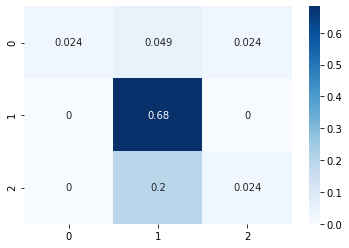

In [43]:
# Print accuracy score and confusion matrix on test set
print('Accuracy on the test set: \n', accuracy_score(y_test, y_predicted))

cf_matrix = confusion_matrix(y_test, y_predicted)/len(y_test)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')


#### Let's see how fine it is working with the pre-defined TextBlob library to guess 'Polarity' and 'Subjectivity'

In [44]:
df_en['Polarity'] = ''
df_en['Subjectivity'] = ''

In [45]:
my_balance = TextBlob(df_en.iloc[0,2])
print("Polarity = ", my_balance.sentiment.polarity)
print("Subjectivity = ", my_balance.sentiment.subjectivity)


Polarity =  0.35
Subjectivity =  0.37142857142857144


In [46]:
df_en.shape

(201, 2005)

In [47]:
df_en.iloc[0,2004]

''

In [48]:
for i in range(len(df_en)):
    my_balance = TextBlob(df_en.iloc[i,2])
    df_en.iloc[i,2003] =  my_balance.sentiment.polarity
    df_en.iloc[i,2004] =  my_balance.sentiment.subjectivity

In [49]:
df_en.head()

,tweet_content,Sentiment,tweet_content_clean,aapl,able,able entertain,accepting,accepting aristotle,according,according mom,...,προσφορές έως,πρώτο,πρώτο private,το,το πρώτο,구혜선,구혜선 그리고봄,그리고,Polarity,Subjectivity
0,"""Eli Apple is a combative, physical corner wit...",2,"""Eli _ _ _ combative, physical corner _ good b...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.35,0.371429
1,"""Sir, Apple Care does not cover us cleaning bi...",1,"""Sir, _ Care _ _ cover us cleaning bits _ pump...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,"""True Colors"" is OUT NOW on iTunes USA! https:...",3,"""True Colors"" _ OUT NOW _ _ USA! _ #BuyTrueCol...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4375,0.65
3,#1 Online Promo! Work with DJ Kay Slay / Strai...,3,#1 Online Promo! Work _ DJ Kay Slay / Straight...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.2
4,#AppleNews: Latest news about #Apple ( #iPhone...,3,#AppleNews: Latest news _ #_ ( #iPhone) . We _...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.433333


In [50]:
df_en['Polarity'] = pd.to_numeric(df_en['Polarity'])
df_en['Subjectivity'] = pd.to_numeric(df_en['Subjectivity'])

In [51]:
df_en['Polarity'].describe()  #Polarity in TextBlob ranges from -1 to 1

count    201.000000
mean       0.136152
std        0.264285
min       -0.625000
25%        0.000000
50%        0.000000
75%        0.227273
max        1.000000
Name: Polarity, dtype: float64

In [52]:
df_en['Subjectivity'].describe()  #subjectivity in TextBlob ranges from 0 to 1

count    201.000000
mean       0.274516
std        0.311222
min        0.000000
25%        0.000000
50%        0.125000
75%        0.500000
max        1.000000
Name: Subjectivity, dtype: float64

Creating a new column of Sentiment in order to compare results of original labels (ranging from 1 to 3) with polarity from textBlob (ranging from -1 to 1).

In [53]:
df_en['Sentiment_adj'] =df_en['Sentiment']

In [54]:
df_en['Sentiment_adj'] = df_en['Sentiment_adj'].replace(1,-1)
df_en['Sentiment_adj'] = df_en['Sentiment_adj'].replace(2,0)
df_en['Sentiment_adj'] = df_en['Sentiment_adj'].replace(3,1)

In [55]:
df_en['Sentiment_adj'].describe()

count    201.000000
mean       0.189055
std        0.577996
min       -1.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Sentiment_adj, dtype: float64

In [56]:
#calculating the difference between the label score and the polarity score obtained with TextBlob
df_en['diff_label_polarity'] = df_en['Sentiment_adj'] - df_en['Polarity']

In [57]:
df_en['diff_label_polarity'].describe()

count    201.000000
mean       0.052902
std        0.600640
min       -1.500000
25%       -0.200000
50%        0.000000
75%        0.500000
max        1.625000
Name: diff_label_polarity, dtype: float64

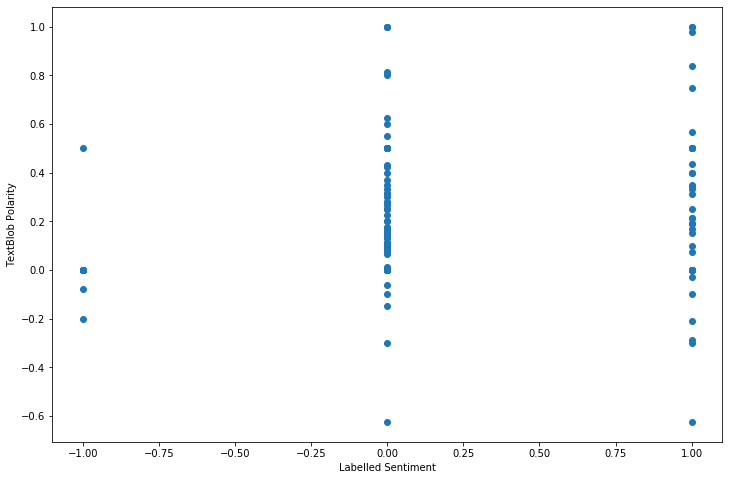

In [58]:
# Plotting  real sentiment vs TextBlob Polarity
plt.figure(figsize=(12,8))
plt.plot(df_en['Sentiment_adj'], df_en['Polarity'], 'o')
plt.xlabel('Labelled Sentiment')
plt.ylabel('TextBlob Polarity')

# Display the plot
plt.show()

In [59]:
#using a plot that better visualizes distribution of variables
df_new = pd.DataFrame(df_en['Sentiment_adj'])
df_new['Polarity'] = df_en['Polarity']

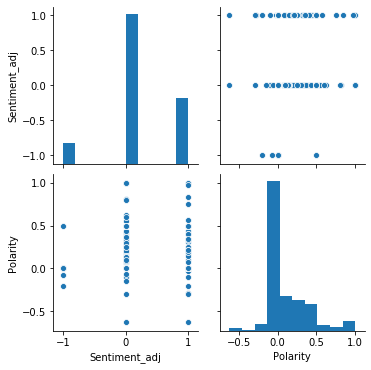

In [60]:
sns.pairplot(df_new)

Definitely we won't use TextBlob to predict sentiment in this case. It's too far from reality. It is tru that for negative sentiments, almost all tweets are below 0 in the Polarity score from text blob. It is also true that it captures fairly well polarity with neutral sentiment, but there is a high bias in identifying positive sentiment tweets.

### Future works:
To get a better accuracy score for the model: apply more cleaning and stopwords, try different ngrams_range, delete 'Eli' tweets from the list that refer to an NFL player, and why not, try other algorithms to predict sentiment (i.e. Naive Bayes, SVM, Deep Learning)